In [1]:
import sqlite3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def visualise_heatmap(year: int):
    df = read_into_pd_df(year)
    return sns.heatmap(
        df,
        linewidth=0.2,
        square=True,
        cmap="Oranges",
        yticklabels=False,
        xticklabels=False,
    )

In [3]:
def read_into_pd_df(year: int):
    """Connect to sqlite3 db, read btc usd spread from given year, and reshape df."""
    conn = sqlite3.connect("../data/sqlite3/data.db")
    df = pd.read_sql_query(
         f"""
        SELECT calendar_week, day_text, spread
        FROM btc_usd_spread
        WHERE year = {year}
        ORDER BY month, day
        ;
        """,
        conn,
    )
    conn.close()
    return reshape(df)


In [4]:
def reshape(df: pd.DataFrame) -> pd.DataFrame:
    r = (df
        .pivot(
            index="day_text",
            columns="calendar_week",
            values="spread")
        .fillna(0))
    r.columns.name = None
    r.index.name = None
    return r

In [5]:
df = read_into_pd_df(2021)
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
Fri,5280.0,5271.0,5021.0,6641.0,1672.0,2440.0,5561.0,4293.0,3090.0,2896.0,...,676.0,3147.0,2710.0,5611.0,5086.0,3014.0,2476.0,1303.0,2845.0,915.0
Mon,5477.0,7783.0,2597.0,2912.0,2318.0,8410.0,2865.0,9641.0,4777.0,3060.0,...,1737.0,3115.0,2819.0,3625.0,2101.0,3629.0,4350.0,1825.0,1506.0,0.0
Sat,2599.0,2454.0,2012.0,2055.0,2731.0,1839.0,3381.0,3210.0,2054.0,5683.0,...,819.0,1546.0,2400.0,1637.0,11176.0,2645.0,1771.0,922.0,0.0,4178.0
Sun,5987.0,2900.0,2055.0,2157.0,2284.0,2584.0,2836.0,3416.0,2431.0,2457.0,...,1540.0,1866.0,1494.0,3919.0,1868.0,2043.0,1804.0,1646.0,0.0,2799.0
Thu,3915.0,3273.0,5498.0,3880.0,2473.0,4733.0,1613.0,5273.0,4155.0,3755.0,...,475.0,1434.0,4411.0,2347.0,1509.0,3479.0,1843.0,3271.0,1868.0,0.0
Tue,4503.0,4074.0,1784.0,2003.0,2519.0,3076.0,3380.0,8856.0,3062.0,2946.0,...,0.0,2167.0,4910.0,2393.0,3203.0,1805.0,2267.0,2637.0,3382.0,0.0
Wed,3611.0,5270.0,2908.0,3173.0,2201.0,3485.0,3602.0,4305.0,4423.0,4246.0,...,2464.0,6002.0,2231.0,1787.0,2529.0,2445.0,2833.0,1091.0,1970.0,0.0


<Axes: >

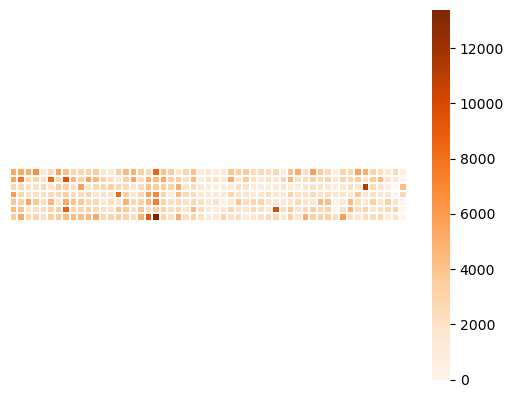

In [6]:
visualise_heatmap(2021)